# Keystroke Dynamics

### Dataset:
The dataset is taken from http://www.vmonaco.com/keystroke-datasets.
Specifically from https://ms.sapientia.ro/~manyi/keystroke.html.

* Number of subjects: 42 (24 male, 18 female)
* Password: .tie5Roanl
* Keys: . t i e [123?] 5 [abc] [Shift] R [Shift] o a n l

### To read:
* https://appliedmachinelearning.blog/2017/07/26/user-verification-based-on-keystroke-dynamics-python-code/

## 1. Loading data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('dataset2_norm.arff')
df = pd.DataFrame(data[0])

In [3]:
df.columns

Index(['holdtime1', 'holdtime2', 'holdtime3', 'holdtime4', 'holdtime5',
       'holdtime6', 'holdtime7', 'holdtime8', 'holdtime9', 'holdtime10',
       'holdtime11', 'holdtime12', 'holdtime13', 'holdtime14', 'downdown1',
       'downdown2', 'downdown3', 'downdown4', 'downdown5', 'downdown6',
       'downdown7', 'downdown8', 'downdown9', 'downdown10', 'downdown11',
       'downdown12', 'downdown13', 'updown1', 'updown2', 'updown3', 'updown4',
       'updown5', 'updown6', 'updown7', 'updown8', 'updown9', 'updown10',
       'updown11', 'updown12', 'updown13', 'pressure1', 'pressure2',
       'pressure3', 'pressure4', 'pressure5', 'pressure6', 'pressure7',
       'pressure8', 'pressure9', 'pressure10', 'pressure11', 'pressure12',
       'pressure13', 'pressure14', 'fingerarea1', 'fingerarea2', 'fingerarea3',
       'fingerarea4', 'fingerarea5', 'fingerarea6', 'fingerarea7',
       'fingerarea8', 'fingerarea9', 'fingerarea10', 'fingerarea11',
       'fingerarea12', 'fingerarea13', 'fingerar

In [4]:
len(df.columns)

72

In [5]:
df.head()

,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea9,fingerarea10,fingerarea11,fingerarea12,fingerarea13,fingerarea14,meanholdtime,meanpressure,meanfingerarea,user_id
0,0.538793,0.462222,0.362903,0.274510,0.300366,0.384259,0.430147,0.467290,0.240,0.374429,...,0.296296,0.296296,0.222222,0.211470,0.283154,0.185185,0.447030,0.387546,0.364089,b'1'
1,0.435345,0.382222,0.354839,0.285714,0.106227,0.328704,0.363971,0.485981,0.344,0.365297,...,0.259259,0.185185,0.185185,0.354839,0.211470,0.148148,0.423762,0.445704,0.369322,b'1'
2,0.478448,0.453333,0.399194,0.338936,0.340659,0.375000,0.338235,0.345794,0.296,0.365297,...,0.296296,0.333333,0.222222,0.283154,0.175627,0.185185,0.454455,0.464092,0.371658,b'1'
3,0.396552,0.444444,0.415323,0.338936,0.366300,0.416667,0.404412,0.640187,0.276,0.410959,...,0.370370,0.185185,0.222222,0.283154,0.247312,0.296296,0.522772,0.397230,0.396828,b'1'
4,0.469828,0.453333,0.290323,0.271709,0.340659,0.361111,0.408088,0.635514,0.324,0.378995,...,0.333333,0.222222,0.222222,0.211470,0.318996,0.074074,0.493564,0.455577,0.365646,b'1'


## 2. Preprocessing 

### 2.0.1 Creating Labels (Y)

In [6]:
%time
label = []
for i in range(42):
    for j in range(51):
        label.append(i)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.62 µs


In [7]:
y = np.array(label)

In [8]:
y.shape

(2142,)

In [9]:
np.mean(y == 0) * 2142

51.0

In [10]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

### 2.0.2 Input Data (X)

In [11]:
df_x = df.iloc[:,:71]

In [12]:
X = df_x.values

In [13]:
X.shape

(2142, 71)

In [14]:
df.head()

,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea9,fingerarea10,fingerarea11,fingerarea12,fingerarea13,fingerarea14,meanholdtime,meanpressure,meanfingerarea,user_id
0,0.538793,0.462222,0.362903,0.274510,0.300366,0.384259,0.430147,0.467290,0.240,0.374429,...,0.296296,0.296296,0.222222,0.211470,0.283154,0.185185,0.447030,0.387546,0.364089,b'1'
1,0.435345,0.382222,0.354839,0.285714,0.106227,0.328704,0.363971,0.485981,0.344,0.365297,...,0.259259,0.185185,0.185185,0.354839,0.211470,0.148148,0.423762,0.445704,0.369322,b'1'
2,0.478448,0.453333,0.399194,0.338936,0.340659,0.375000,0.338235,0.345794,0.296,0.365297,...,0.296296,0.333333,0.222222,0.283154,0.175627,0.185185,0.454455,0.464092,0.371658,b'1'
3,0.396552,0.444444,0.415323,0.338936,0.366300,0.416667,0.404412,0.640187,0.276,0.410959,...,0.370370,0.185185,0.222222,0.283154,0.247312,0.296296,0.522772,0.397230,0.396828,b'1'
4,0.469828,0.453333,0.290323,0.271709,0.340659,0.361111,0.408088,0.635514,0.324,0.378995,...,0.333333,0.222222,0.222222,0.211470,0.318996,0.074074,0.493564,0.455577,0.365646,b'1'


In [15]:
df.columns

Index(['holdtime1', 'holdtime2', 'holdtime3', 'holdtime4', 'holdtime5',
       'holdtime6', 'holdtime7', 'holdtime8', 'holdtime9', 'holdtime10',
       'holdtime11', 'holdtime12', 'holdtime13', 'holdtime14', 'downdown1',
       'downdown2', 'downdown3', 'downdown4', 'downdown5', 'downdown6',
       'downdown7', 'downdown8', 'downdown9', 'downdown10', 'downdown11',
       'downdown12', 'downdown13', 'updown1', 'updown2', 'updown3', 'updown4',
       'updown5', 'updown6', 'updown7', 'updown8', 'updown9', 'updown10',
       'updown11', 'updown12', 'updown13', 'pressure1', 'pressure2',
       'pressure3', 'pressure4', 'pressure5', 'pressure6', 'pressure7',
       'pressure8', 'pressure9', 'pressure10', 'pressure11', 'pressure12',
       'pressure13', 'pressure14', 'fingerarea1', 'fingerarea2', 'fingerarea3',
       'fingerarea4', 'fingerarea5', 'fingerarea6', 'fingerarea7',
       'fingerarea8', 'fingerarea9', 'fingerarea10', 'fingerarea11',
       'fingerarea12', 'fingerarea13', 'fingerar

In [16]:
dot_ = df[['holdtime1', 'downdown1', 'updown1', 'pressure1', 'fingerarea1']]

In [17]:
dot_.insert(1, 'downdown0', 0)

In [18]:
dot_.insert(3, 'updown0', 0)

In [19]:
dot_ = dot_.values

In [20]:
t_ = df[['holdtime2', 'downdown1', 'downdown2', 'updown1', 'updown2','pressure2','fingerarea2']].values

In [21]:
i_ = df[['holdtime3', 'downdown2', 'downdown3', 'updown2', 'updown3','pressure3','fingerarea3']].values

In [22]:
e_ = df[['holdtime4', 'downdown3', 'downdown4', 'updown3', 'updown4','pressure4','fingerarea4']].values

In [23]:
num_ = df[['holdtime5', 'downdown4', 'downdown5', 'updown4', 'updown5','pressure5','fingerarea5']].values

In [24]:
five_ = df[['holdtime6', 'downdown5', 'downdown6', 'updown5', 'updown6','pressure6','fingerarea6']].values

In [25]:
lang_ = df[['holdtime7', 'downdown6', 'downdown7', 'updown6', 'updown7','pressure7','fingerarea7']].values

In [26]:
shift1_ = df[['holdtime8', 'downdown7', 'downdown8', 'updown7', 'updown8','pressure8','fingerarea8']].values

In [27]:
R_ = df[['holdtime9', 'downdown8', 'downdown9', 'updown8', 'updown9','pressure9','fingerarea9']].values

In [28]:
shift2_ = df[['holdtime10', 'downdown9', 'downdown10', 'updown9', 'updown10','pressure10','fingerarea10']].values

In [29]:
o_ = df[['holdtime11', 'downdown10', 'downdown11', 'updown10', 'updown11','pressure11','fingerarea11']].values

In [30]:
a_ = df[['holdtime12', 'downdown11', 'downdown12', 'updown11', 'updown12','pressure12','fingerarea12']].values

In [31]:
n_ = df[['holdtime13', 'downdown12', 'downdown13', 'updown12', 'updown13','pressure13','fingerarea13']].values

In [32]:
l_ = df[['holdtime14', 'downdown13', 'updown13','pressure14','fingerarea14']]

In [33]:
l_.insert(2, 'downdown14', 0)

In [34]:
l_.insert(4, 'updown14', 0)

In [35]:
l_ = l_.values

In [36]:
l_.shape

(2142, 7)

In [37]:
dot_[0]

array([0.538793, 0.      , 0.027918, 0.      , 0.02735 , 0.274194,
       0.299065])

In [43]:
main = []
for i in range(2142):
    inter_ = []
    inter_.append(dot_[i].tolist())
    inter_.append(t_[i].tolist())
    inter_.append(i_[i].tolist())
    inter_.append(e_[i].tolist())
    inter_.append(num_[i].tolist())
    inter_.append(five_[i].tolist())
    inter_.append(lang_[i].tolist())
    inter_.append(shift1_[i].tolist())
    inter_.append(R_[i].tolist())
    inter_.append(shift2_[i].tolist())
    inter_.append(o_[i].tolist())
    inter_.append(a_[i].tolist())
    inter_.append(n_[i].tolist())
    inter_.append(l_[i].tolist())
    main.append(inter_)

In [47]:
main_np = np.array(main)

In [48]:
main_np.shape

(2142, 14, 7)

### 2.1 One Hot Encoding

Source: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [49]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [50]:
Y = to_categorical(y)

In [51]:
Y.shape

(2142, 42)

In [52]:
Y[51].shape

(42,)

### 2.2 Splitting the dataset into the Training and Testing

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(main_np, Y, test_size = 0.2)

In [63]:
X_train.shape

(1713, 14, 7)

In [64]:
2142 * 0.8

1713.6000000000001

In [65]:
Y_train.shape

(1713, 42)

In [66]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

As it can be seen, train_test_split splits the data randomly.

## 3. LSTM

In [177]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers
from keras.layers import GRU

In [178]:
model = Sequential()

In [179]:
model.add(GRU(16,  input_shape = (14, 7)))

In [180]:
model.add(Dropout(0.3))

In [181]:
model.add(Dense(units = 42, 
                activation = 'softmax'))

In [182]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 16)                1152      
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 42)                714       
Total params: 1,866
Trainable params: 1,866
Non-trainable params: 0
_________________________________________________________________


In [183]:
#sgd = optimizers.SGD(lr = 0.05)

Source: https://keras.io/optimizers/

In [203]:
adam = optimizers.Adam(lr = 0.01)

In [204]:
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [205]:
#Early Stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', 
                             #verbose=1, 
                             monitor='val_acc',
                             save_best_only=True, 
                             mode='auto')

In [206]:
es = EarlyStopping(monitor = 'val_loss', 
                   mode = 'auto', 
                   patience=100, 
                   restore_best_weights = True)

In [207]:
%time
train_history = model.fit(X_train, Y_train, 
                          batch_size = 32, 
                          epochs = 2000, 
                          verbose = 2,
                          validation_split = 0.2,
                          callbacks = [checkpoint]
                         )

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs
Train on 1370 samples, validate on 343 samples
Epoch 1/2000
 - 1s - loss: 0.3922 - acc: 0.8657 - val_loss: 0.9235 - val_acc: 0.7726
Epoch 2/2000
 - 0s - loss: 0.3113 - acc: 0.8832 - val_loss: 0.8721 - val_acc: 0.7901
Epoch 3/2000
 - 0s - loss: 0.3138 - acc: 0.8861 - val_loss: 0.9434 - val_acc: 0.7638
Epoch 4/2000
 - 0s - loss: 0.3012 - acc: 0.8964 - val_loss: 0.8940 - val_acc: 0.7843
Epoch 5/2000
 - 0s - loss: 0.3201 - acc: 0.8810 - val_loss: 0.9133 - val_acc: 0.7551
Epoch 6/2000
 - 0s - loss: 0.2929 - acc: 0.8978 - val_loss: 0.9185 - val_acc: 0.7726
Epoch 7/2000
 - 0s - loss: 0.2877 - acc: 0.8971 - val_loss: 0.9212 - val_acc: 0.7755
Epoch 8/2000
 - 0s - loss: 0.3177 - acc: 0.8883 - val_loss: 0.9054 - val_acc: 0.7813
Epoch 9/2000
 - 0s - loss: 0.3097 - acc: 0.8898 - val_loss: 0.9205 - val_acc: 0.7755
Epoch 10/2000
 - 0s - loss: 0.3203 - acc: 0.8781 - val_loss: 1.0194 - val_acc: 0.7434
Epoch 11/2000
 - 0s - loss: 0.2996 - a

 - 0s - loss: 0.3252 - acc: 0.8781 - val_loss: 1.2084 - val_acc: 0.7813
Epoch 96/2000
 - 0s - loss: 0.3323 - acc: 0.8869 - val_loss: 1.2450 - val_acc: 0.7813
Epoch 97/2000
 - 0s - loss: 0.2869 - acc: 0.8971 - val_loss: 1.1151 - val_acc: 0.7843
Epoch 98/2000
 - 0s - loss: 0.2468 - acc: 0.9161 - val_loss: 1.0773 - val_acc: 0.7959
Epoch 99/2000
 - 0s - loss: 0.2797 - acc: 0.8971 - val_loss: 1.0662 - val_acc: 0.7872
Epoch 100/2000
 - 0s - loss: 0.2271 - acc: 0.9219 - val_loss: 1.2093 - val_acc: 0.7784
Epoch 101/2000
 - 0s - loss: 0.2417 - acc: 0.9080 - val_loss: 1.1186 - val_acc: 0.7901
Epoch 102/2000
 - 0s - loss: 0.2293 - acc: 0.9190 - val_loss: 1.1684 - val_acc: 0.7726
Epoch 103/2000
 - 0s - loss: 0.2542 - acc: 0.9088 - val_loss: 1.1878 - val_acc: 0.7813
Epoch 104/2000
 - 0s - loss: 0.2363 - acc: 0.9029 - val_loss: 1.1922 - val_acc: 0.7726
Epoch 105/2000
 - 0s - loss: 0.2575 - acc: 0.9204 - val_loss: 1.1238 - val_acc: 0.7726
Epoch 106/2000
 - 0s - loss: 0.2329 - acc: 0.9248 - val_loss: 

Epoch 190/2000
 - 0s - loss: 0.2153 - acc: 0.9248 - val_loss: 1.3024 - val_acc: 0.7638
Epoch 191/2000
 - 0s - loss: 0.2325 - acc: 0.9168 - val_loss: 1.2883 - val_acc: 0.7609
Epoch 192/2000
 - 0s - loss: 0.2245 - acc: 0.9219 - val_loss: 1.3202 - val_acc: 0.7580
Epoch 193/2000
 - 0s - loss: 0.2034 - acc: 0.9343 - val_loss: 1.3674 - val_acc: 0.7697
Epoch 194/2000
 - 0s - loss: 0.2046 - acc: 0.9277 - val_loss: 1.3206 - val_acc: 0.7755
Epoch 195/2000
 - 0s - loss: 0.2053 - acc: 0.9255 - val_loss: 1.2857 - val_acc: 0.7638
Epoch 196/2000
 - 0s - loss: 0.2125 - acc: 0.9219 - val_loss: 1.3124 - val_acc: 0.7638
Epoch 197/2000
 - 0s - loss: 0.1950 - acc: 0.9307 - val_loss: 1.2835 - val_acc: 0.7813
Epoch 198/2000
 - 0s - loss: 0.2111 - acc: 0.9190 - val_loss: 1.2946 - val_acc: 0.7697
Epoch 199/2000
 - 0s - loss: 0.2141 - acc: 0.9292 - val_loss: 1.2788 - val_acc: 0.7609
Epoch 200/2000
 - 0s - loss: 0.2544 - acc: 0.9080 - val_loss: 1.2342 - val_acc: 0.7901
Epoch 201/2000
 - 0s - loss: 0.2206 - acc: 

 - 0s - loss: 0.2327 - acc: 0.9204 - val_loss: 1.2340 - val_acc: 0.7784
Epoch 285/2000
 - 0s - loss: 0.1956 - acc: 0.9270 - val_loss: 1.2979 - val_acc: 0.7668
Epoch 286/2000
 - 0s - loss: 0.1997 - acc: 0.9248 - val_loss: 1.2754 - val_acc: 0.7959
Epoch 287/2000
 - 0s - loss: 0.2055 - acc: 0.9307 - val_loss: 1.2544 - val_acc: 0.7988
Epoch 288/2000
 - 0s - loss: 0.1992 - acc: 0.9299 - val_loss: 1.3251 - val_acc: 0.7843
Epoch 289/2000
 - 0s - loss: 0.2530 - acc: 0.9131 - val_loss: 1.3102 - val_acc: 0.7638
Epoch 290/2000
 - 0s - loss: 0.2011 - acc: 0.9314 - val_loss: 1.2611 - val_acc: 0.7668
Epoch 291/2000
 - 0s - loss: 0.1786 - acc: 0.9307 - val_loss: 1.3115 - val_acc: 0.7784
Epoch 292/2000
 - 0s - loss: 0.1933 - acc: 0.9299 - val_loss: 1.3216 - val_acc: 0.7668
Epoch 293/2000
 - 0s - loss: 0.1994 - acc: 0.9401 - val_loss: 1.3252 - val_acc: 0.7697
Epoch 294/2000
 - 0s - loss: 0.2117 - acc: 0.9277 - val_loss: 1.2544 - val_acc: 0.7726
Epoch 295/2000
 - 0s - loss: 0.2514 - acc: 0.9131 - val_lo

Epoch 379/2000
 - 0s - loss: 0.3579 - acc: 0.8876 - val_loss: 1.1475 - val_acc: 0.7755
Epoch 380/2000
 - 0s - loss: 0.2287 - acc: 0.9182 - val_loss: 1.3220 - val_acc: 0.7434
Epoch 381/2000
 - 0s - loss: 0.3270 - acc: 0.8920 - val_loss: 1.1905 - val_acc: 0.7580
Epoch 382/2000
 - 0s - loss: 0.2598 - acc: 0.9102 - val_loss: 1.2778 - val_acc: 0.7697
Epoch 383/2000
 - 0s - loss: 0.2351 - acc: 0.9204 - val_loss: 1.2556 - val_acc: 0.7522
Epoch 384/2000
 - 0s - loss: 0.2393 - acc: 0.9153 - val_loss: 1.2711 - val_acc: 0.7726
Epoch 385/2000
 - 0s - loss: 0.2302 - acc: 0.9153 - val_loss: 1.2018 - val_acc: 0.7784
Epoch 386/2000
 - 0s - loss: 0.2083 - acc: 0.9241 - val_loss: 1.2716 - val_acc: 0.7726
Epoch 387/2000
 - 0s - loss: 0.2043 - acc: 0.9277 - val_loss: 1.2331 - val_acc: 0.7638
Epoch 388/2000
 - 0s - loss: 0.1938 - acc: 0.9270 - val_loss: 1.2403 - val_acc: 0.7551
Epoch 389/2000
 - 0s - loss: 0.1815 - acc: 0.9336 - val_loss: 1.2527 - val_acc: 0.7726
Epoch 390/2000
 - 0s - loss: 0.2088 - acc: 

 - 0s - loss: 0.1919 - acc: 0.9314 - val_loss: 1.2633 - val_acc: 0.7522
Epoch 474/2000
 - 0s - loss: 0.2279 - acc: 0.9197 - val_loss: 1.2142 - val_acc: 0.7784
Epoch 475/2000
 - 0s - loss: 0.2802 - acc: 0.9007 - val_loss: 1.1630 - val_acc: 0.7813
Epoch 476/2000
 - 0s - loss: 0.2253 - acc: 0.9095 - val_loss: 1.2529 - val_acc: 0.7609
Epoch 477/2000
 - 0s - loss: 0.2098 - acc: 0.9212 - val_loss: 1.2310 - val_acc: 0.7697
Epoch 478/2000
 - 0s - loss: 0.2609 - acc: 0.9109 - val_loss: 1.3989 - val_acc: 0.7347
Epoch 479/2000
 - 0s - loss: 0.2289 - acc: 0.9263 - val_loss: 1.3655 - val_acc: 0.7376
Epoch 480/2000
 - 0s - loss: 0.2375 - acc: 0.9197 - val_loss: 1.2842 - val_acc: 0.7784
Epoch 481/2000
 - 0s - loss: 0.2984 - acc: 0.9000 - val_loss: 1.2376 - val_acc: 0.7697
Epoch 482/2000
 - 0s - loss: 0.2401 - acc: 0.9117 - val_loss: 1.2529 - val_acc: 0.7813
Epoch 483/2000
 - 0s - loss: 0.2360 - acc: 0.9131 - val_loss: 1.3793 - val_acc: 0.7726
Epoch 484/2000
 - 0s - loss: 0.2614 - acc: 0.9139 - val_lo

Epoch 568/2000
 - 0s - loss: 0.1977 - acc: 0.9212 - val_loss: 1.3131 - val_acc: 0.7522
Epoch 569/2000
 - 0s - loss: 0.1943 - acc: 0.9328 - val_loss: 1.3359 - val_acc: 0.7755
Epoch 570/2000
 - 0s - loss: 0.2062 - acc: 0.9255 - val_loss: 1.2602 - val_acc: 0.7872
Epoch 571/2000
 - 0s - loss: 0.2076 - acc: 0.9212 - val_loss: 1.4111 - val_acc: 0.7697
Epoch 572/2000
 - 0s - loss: 0.1896 - acc: 0.9387 - val_loss: 1.4145 - val_acc: 0.7638
Epoch 573/2000
 - 0s - loss: 0.2426 - acc: 0.9139 - val_loss: 1.4506 - val_acc: 0.7668
Epoch 574/2000
 - 0s - loss: 0.2047 - acc: 0.9285 - val_loss: 1.4724 - val_acc: 0.7726
Epoch 575/2000
 - 0s - loss: 0.1923 - acc: 0.9328 - val_loss: 1.3967 - val_acc: 0.7813
Epoch 576/2000
 - 0s - loss: 0.2125 - acc: 0.9241 - val_loss: 1.3995 - val_acc: 0.7609
Epoch 577/2000
 - 0s - loss: 0.2566 - acc: 0.9080 - val_loss: 1.3733 - val_acc: 0.7493
Epoch 578/2000
 - 0s - loss: 0.3712 - acc: 0.8832 - val_loss: 1.5680 - val_acc: 0.7172
Epoch 579/2000
 - 0s - loss: 0.3754 - acc: 

 - 0s - loss: 0.1663 - acc: 0.9328 - val_loss: 1.2757 - val_acc: 0.7872
Epoch 663/2000
 - 0s - loss: 0.2319 - acc: 0.9197 - val_loss: 1.3684 - val_acc: 0.7813
Epoch 664/2000
 - 0s - loss: 0.2040 - acc: 0.9212 - val_loss: 1.2954 - val_acc: 0.7843
Epoch 665/2000
 - 0s - loss: 0.1701 - acc: 0.9350 - val_loss: 1.4125 - val_acc: 0.7668
Epoch 666/2000
 - 0s - loss: 0.1853 - acc: 0.9350 - val_loss: 1.3836 - val_acc: 0.7813
Epoch 667/2000
 - 0s - loss: 0.1857 - acc: 0.9350 - val_loss: 1.4219 - val_acc: 0.7784
Epoch 668/2000
 - 0s - loss: 0.1722 - acc: 0.9292 - val_loss: 1.4447 - val_acc: 0.7843
Epoch 669/2000
 - 0s - loss: 0.2205 - acc: 0.9234 - val_loss: 1.4053 - val_acc: 0.7813
Epoch 670/2000
 - 0s - loss: 0.2017 - acc: 0.9285 - val_loss: 1.3642 - val_acc: 0.7930
Epoch 671/2000
 - 0s - loss: 0.1911 - acc: 0.9241 - val_loss: 1.4251 - val_acc: 0.7638
Epoch 672/2000
 - 0s - loss: 0.1712 - acc: 0.9416 - val_loss: 1.2987 - val_acc: 0.7843
Epoch 673/2000
 - 0s - loss: 0.1948 - acc: 0.9343 - val_lo

Epoch 757/2000
 - 0s - loss: 0.2246 - acc: 0.9190 - val_loss: 1.2115 - val_acc: 0.7726
Epoch 758/2000
 - 0s - loss: 0.2126 - acc: 0.9299 - val_loss: 1.2613 - val_acc: 0.7755
Epoch 759/2000
 - 0s - loss: 0.2314 - acc: 0.9109 - val_loss: 1.4303 - val_acc: 0.7668
Epoch 760/2000
 - 0s - loss: 0.2751 - acc: 0.9036 - val_loss: 1.3318 - val_acc: 0.7551
Epoch 761/2000
 - 0s - loss: 0.2162 - acc: 0.9263 - val_loss: 1.3966 - val_acc: 0.7522
Epoch 762/2000
 - 0s - loss: 0.2117 - acc: 0.9321 - val_loss: 1.3518 - val_acc: 0.7668
Epoch 763/2000
 - 0s - loss: 0.3438 - acc: 0.8898 - val_loss: 1.5127 - val_acc: 0.7434
Epoch 764/2000
 - 0s - loss: 0.2970 - acc: 0.8985 - val_loss: 1.3058 - val_acc: 0.7726
Epoch 765/2000
 - 0s - loss: 0.2540 - acc: 0.9036 - val_loss: 1.1738 - val_acc: 0.7726
Epoch 766/2000
 - 0s - loss: 0.2133 - acc: 0.9248 - val_loss: 1.2969 - val_acc: 0.7813
Epoch 767/2000
 - 0s - loss: 0.1970 - acc: 0.9350 - val_loss: 1.2891 - val_acc: 0.7813
Epoch 768/2000
 - 0s - loss: 0.2036 - acc: 

 - 0s - loss: 0.2383 - acc: 0.9139 - val_loss: 1.3707 - val_acc: 0.7843
Epoch 852/2000
 - 0s - loss: 0.1956 - acc: 0.9321 - val_loss: 1.2817 - val_acc: 0.7726
Epoch 853/2000
 - 0s - loss: 0.1945 - acc: 0.9321 - val_loss: 1.3058 - val_acc: 0.7638
Epoch 854/2000
 - 0s - loss: 0.1965 - acc: 0.9285 - val_loss: 1.2889 - val_acc: 0.7580
Epoch 855/2000
 - 0s - loss: 0.2315 - acc: 0.9190 - val_loss: 1.3152 - val_acc: 0.7668
Epoch 856/2000
 - 0s - loss: 0.1989 - acc: 0.9226 - val_loss: 1.3118 - val_acc: 0.7668
Epoch 857/2000
 - 0s - loss: 0.1823 - acc: 0.9270 - val_loss: 1.2156 - val_acc: 0.7726
Epoch 858/2000
 - 0s - loss: 0.1870 - acc: 0.9350 - val_loss: 1.2988 - val_acc: 0.7755
Epoch 859/2000
 - 0s - loss: 0.1957 - acc: 0.9358 - val_loss: 1.3521 - val_acc: 0.7755
Epoch 860/2000
 - 0s - loss: 0.2294 - acc: 0.9168 - val_loss: 1.3107 - val_acc: 0.7755
Epoch 861/2000
 - 0s - loss: 0.2365 - acc: 0.9153 - val_loss: 1.2673 - val_acc: 0.7493
Epoch 862/2000
 - 0s - loss: 0.2176 - acc: 0.9255 - val_lo

Epoch 946/2000
 - 0s - loss: 0.2305 - acc: 0.9161 - val_loss: 1.2844 - val_acc: 0.7755
Epoch 947/2000
 - 0s - loss: 0.1994 - acc: 0.9219 - val_loss: 1.2875 - val_acc: 0.7580
Epoch 948/2000
 - 0s - loss: 0.1659 - acc: 0.9467 - val_loss: 1.3455 - val_acc: 0.7697
Epoch 949/2000
 - 0s - loss: 0.1775 - acc: 0.9401 - val_loss: 1.2725 - val_acc: 0.7755
Epoch 950/2000
 - 0s - loss: 0.2116 - acc: 0.9175 - val_loss: 1.2658 - val_acc: 0.7784
Epoch 951/2000
 - 0s - loss: 0.2159 - acc: 0.9270 - val_loss: 1.2450 - val_acc: 0.7872
Epoch 952/2000
 - 0s - loss: 0.2075 - acc: 0.9226 - val_loss: 1.3335 - val_acc: 0.7813
Epoch 953/2000
 - 0s - loss: 0.1827 - acc: 0.9314 - val_loss: 1.3207 - val_acc: 0.8017
Epoch 954/2000
 - 0s - loss: 0.1919 - acc: 0.9328 - val_loss: 1.2868 - val_acc: 0.7901
Epoch 955/2000
 - 0s - loss: 0.1817 - acc: 0.9358 - val_loss: 1.3409 - val_acc: 0.7901
Epoch 956/2000
 - 0s - loss: 0.1992 - acc: 0.9248 - val_loss: 1.3944 - val_acc: 0.7755
Epoch 957/2000
 - 0s - loss: 0.1917 - acc: 

Epoch 1040/2000
 - 0s - loss: 0.1834 - acc: 0.9423 - val_loss: 1.4165 - val_acc: 0.7668
Epoch 1041/2000
 - 0s - loss: 0.1502 - acc: 0.9445 - val_loss: 1.3097 - val_acc: 0.7813
Epoch 1042/2000
 - 0s - loss: 0.1895 - acc: 0.9321 - val_loss: 1.3429 - val_acc: 0.7668
Epoch 1043/2000
 - 0s - loss: 0.1823 - acc: 0.9372 - val_loss: 1.3254 - val_acc: 0.7697
Epoch 1044/2000
 - 0s - loss: 0.2005 - acc: 0.9336 - val_loss: 1.3310 - val_acc: 0.7522
Epoch 1045/2000
 - 0s - loss: 0.1593 - acc: 0.9431 - val_loss: 1.3535 - val_acc: 0.7755
Epoch 1046/2000
 - 0s - loss: 0.1617 - acc: 0.9445 - val_loss: 1.3910 - val_acc: 0.7784
Epoch 1047/2000
 - 0s - loss: 0.1902 - acc: 0.9292 - val_loss: 1.4400 - val_acc: 0.7755
Epoch 1048/2000
 - 0s - loss: 0.2549 - acc: 0.9161 - val_loss: 1.4175 - val_acc: 0.7376
Epoch 1049/2000
 - 0s - loss: 0.2761 - acc: 0.9058 - val_loss: 1.2997 - val_acc: 0.7638
Epoch 1050/2000
 - 0s - loss: 0.3046 - acc: 0.8978 - val_loss: 1.3000 - val_acc: 0.7726
Epoch 1051/2000
 - 0s - loss: 0.

 - 0s - loss: 0.1857 - acc: 0.9321 - val_loss: 1.3371 - val_acc: 0.7580
Epoch 1134/2000
 - 0s - loss: 0.2057 - acc: 0.9263 - val_loss: 1.2694 - val_acc: 0.7784
Epoch 1135/2000
 - 0s - loss: 0.1558 - acc: 0.9489 - val_loss: 1.3214 - val_acc: 0.7843
Epoch 1136/2000
 - 0s - loss: 0.1442 - acc: 0.9460 - val_loss: 1.4742 - val_acc: 0.7697
Epoch 1137/2000
 - 0s - loss: 0.1524 - acc: 0.9496 - val_loss: 1.3351 - val_acc: 0.7668
Epoch 1138/2000
 - 0s - loss: 0.2132 - acc: 0.9197 - val_loss: 1.3970 - val_acc: 0.7522
Epoch 1139/2000
 - 0s - loss: 0.6025 - acc: 0.8460 - val_loss: 1.3638 - val_acc: 0.7259
Epoch 1140/2000
 - 0s - loss: 0.3832 - acc: 0.8628 - val_loss: 1.2759 - val_acc: 0.7522
Epoch 1141/2000
 - 0s - loss: 0.2837 - acc: 0.9000 - val_loss: 1.3043 - val_acc: 0.7638
Epoch 1142/2000
 - 0s - loss: 0.2506 - acc: 0.9153 - val_loss: 1.1724 - val_acc: 0.7930
Epoch 1143/2000
 - 0s - loss: 0.2537 - acc: 0.9036 - val_loss: 1.3389 - val_acc: 0.7784
Epoch 1144/2000
 - 0s - loss: 0.2329 - acc: 0.91

Epoch 1227/2000
 - 0s - loss: 0.2123 - acc: 0.9277 - val_loss: 1.3440 - val_acc: 0.7638
Epoch 1228/2000
 - 0s - loss: 0.2130 - acc: 0.9212 - val_loss: 1.4330 - val_acc: 0.7668
Epoch 1229/2000
 - 0s - loss: 0.1927 - acc: 0.9263 - val_loss: 1.3085 - val_acc: 0.7755
Epoch 1230/2000
 - 0s - loss: 0.1689 - acc: 0.9394 - val_loss: 1.4452 - val_acc: 0.7726
Epoch 1231/2000
 - 0s - loss: 0.1683 - acc: 0.9401 - val_loss: 1.4273 - val_acc: 0.7609
Epoch 1232/2000
 - 0s - loss: 0.1878 - acc: 0.9350 - val_loss: 1.4039 - val_acc: 0.7580
Epoch 1233/2000
 - 0s - loss: 0.1588 - acc: 0.9474 - val_loss: 1.3618 - val_acc: 0.7755
Epoch 1234/2000
 - 0s - loss: 0.1665 - acc: 0.9380 - val_loss: 1.2853 - val_acc: 0.7580
Epoch 1235/2000
 - 0s - loss: 0.1771 - acc: 0.9365 - val_loss: 1.3397 - val_acc: 0.7609
Epoch 1236/2000
 - 0s - loss: 0.1967 - acc: 0.9350 - val_loss: 1.3854 - val_acc: 0.7609
Epoch 1237/2000
 - 0s - loss: 0.2423 - acc: 0.9190 - val_loss: 1.3503 - val_acc: 0.7522
Epoch 1238/2000
 - 0s - loss: 0.

 - 0s - loss: 0.1755 - acc: 0.9416 - val_loss: 1.3350 - val_acc: 0.7668
Epoch 1321/2000
 - 0s - loss: 0.1733 - acc: 0.9431 - val_loss: 1.3488 - val_acc: 0.7697
Epoch 1322/2000
 - 0s - loss: 0.1438 - acc: 0.9445 - val_loss: 1.4255 - val_acc: 0.7609
Epoch 1323/2000
 - 0s - loss: 0.1625 - acc: 0.9416 - val_loss: 1.4188 - val_acc: 0.7580
Epoch 1324/2000
 - 0s - loss: 0.1564 - acc: 0.9438 - val_loss: 1.3808 - val_acc: 0.7668
Epoch 1325/2000
 - 0s - loss: 0.1920 - acc: 0.9336 - val_loss: 1.4067 - val_acc: 0.7726
Epoch 1326/2000
 - 0s - loss: 0.1711 - acc: 0.9343 - val_loss: 1.4495 - val_acc: 0.7668
Epoch 1327/2000
 - 0s - loss: 0.1831 - acc: 0.9307 - val_loss: 1.4367 - val_acc: 0.7638
Epoch 1328/2000
 - 0s - loss: 0.2316 - acc: 0.9204 - val_loss: 1.3129 - val_acc: 0.7697
Epoch 1329/2000
 - 0s - loss: 0.2804 - acc: 0.9139 - val_loss: 1.4091 - val_acc: 0.7638
Epoch 1330/2000
 - 0s - loss: 0.2466 - acc: 0.9197 - val_loss: 1.4052 - val_acc: 0.7638
Epoch 1331/2000
 - 0s - loss: 0.2362 - acc: 0.91

Epoch 1414/2000
 - 0s - loss: 0.2006 - acc: 0.9292 - val_loss: 1.3040 - val_acc: 0.7668
Epoch 1415/2000
 - 0s - loss: 0.1782 - acc: 0.9314 - val_loss: 1.3307 - val_acc: 0.7697
Epoch 1416/2000
 - 0s - loss: 0.1820 - acc: 0.9277 - val_loss: 1.4132 - val_acc: 0.7697
Epoch 1417/2000
 - 0s - loss: 0.1656 - acc: 0.9380 - val_loss: 1.4494 - val_acc: 0.7668
Epoch 1418/2000
 - 0s - loss: 0.1960 - acc: 0.9226 - val_loss: 1.4182 - val_acc: 0.7609
Epoch 1419/2000
 - 0s - loss: 0.1991 - acc: 0.9277 - val_loss: 1.3681 - val_acc: 0.7580
Epoch 1420/2000
 - 0s - loss: 0.1694 - acc: 0.9387 - val_loss: 1.3606 - val_acc: 0.7522
Epoch 1421/2000
 - 0s - loss: 0.2835 - acc: 0.9139 - val_loss: 1.5826 - val_acc: 0.7347
Epoch 1422/2000
 - 0s - loss: 0.3303 - acc: 0.8883 - val_loss: 1.4277 - val_acc: 0.7376
Epoch 1423/2000
 - 0s - loss: 0.3043 - acc: 0.8993 - val_loss: 1.4325 - val_acc: 0.7638
Epoch 1424/2000
 - 0s - loss: 0.3325 - acc: 0.8949 - val_loss: 1.4987 - val_acc: 0.7638
Epoch 1425/2000
 - 0s - loss: 0.

 - 0s - loss: 0.1658 - acc: 0.9365 - val_loss: 1.3933 - val_acc: 0.7609
Epoch 1508/2000
 - 0s - loss: 0.1733 - acc: 0.9328 - val_loss: 1.4641 - val_acc: 0.7813
Epoch 1509/2000
 - 0s - loss: 0.2067 - acc: 0.9219 - val_loss: 1.7062 - val_acc: 0.7318
Epoch 1510/2000
 - 0s - loss: 0.1738 - acc: 0.9350 - val_loss: 1.5259 - val_acc: 0.7493
Epoch 1511/2000
 - 0s - loss: 0.2754 - acc: 0.9000 - val_loss: 1.4478 - val_acc: 0.7551
Epoch 1512/2000
 - 0s - loss: 0.2060 - acc: 0.9234 - val_loss: 1.4254 - val_acc: 0.7697
Epoch 1513/2000
 - 0s - loss: 0.1862 - acc: 0.9307 - val_loss: 1.3428 - val_acc: 0.7755
Epoch 1514/2000
 - 0s - loss: 0.2279 - acc: 0.9168 - val_loss: 1.4165 - val_acc: 0.7609
Epoch 1515/2000
 - 0s - loss: 0.2287 - acc: 0.9146 - val_loss: 1.3289 - val_acc: 0.7813
Epoch 1516/2000
 - 0s - loss: 0.1812 - acc: 0.9307 - val_loss: 1.4231 - val_acc: 0.7493
Epoch 1517/2000
 - 0s - loss: 0.1780 - acc: 0.9358 - val_loss: 1.4070 - val_acc: 0.7726
Epoch 1518/2000
 - 0s - loss: 0.2210 - acc: 0.92

Epoch 1601/2000
 - 0s - loss: 0.2634 - acc: 0.9153 - val_loss: 1.4751 - val_acc: 0.7464
Epoch 1602/2000
 - 0s - loss: 0.1793 - acc: 0.9350 - val_loss: 1.3745 - val_acc: 0.7726
Epoch 1603/2000
 - 0s - loss: 0.1838 - acc: 0.9358 - val_loss: 1.3200 - val_acc: 0.7726
Epoch 1604/2000
 - 0s - loss: 0.2073 - acc: 0.9285 - val_loss: 1.4520 - val_acc: 0.7638
Epoch 1605/2000
 - 0s - loss: 0.1768 - acc: 0.9401 - val_loss: 1.3589 - val_acc: 0.7843
Epoch 1606/2000
 - 0s - loss: 0.2219 - acc: 0.9277 - val_loss: 1.4747 - val_acc: 0.7493
Epoch 1607/2000
 - 0s - loss: 0.1891 - acc: 0.9336 - val_loss: 1.3869 - val_acc: 0.7580
Epoch 1608/2000
 - 0s - loss: 0.1820 - acc: 0.9328 - val_loss: 1.4146 - val_acc: 0.7668
Epoch 1609/2000
 - 0s - loss: 0.1999 - acc: 0.9255 - val_loss: 1.3914 - val_acc: 0.7638
Epoch 1610/2000
 - 0s - loss: 0.3938 - acc: 0.8693 - val_loss: 1.4444 - val_acc: 0.7580
Epoch 1611/2000
 - 0s - loss: 0.2908 - acc: 0.9022 - val_loss: 1.3007 - val_acc: 0.7813
Epoch 1612/2000
 - 0s - loss: 0.

 - 0s - loss: 0.1490 - acc: 0.9474 - val_loss: 1.5115 - val_acc: 0.7668
Epoch 1695/2000
 - 0s - loss: 0.1721 - acc: 0.9307 - val_loss: 1.4954 - val_acc: 0.7580
Epoch 1696/2000
 - 0s - loss: 0.1882 - acc: 0.9343 - val_loss: 1.5078 - val_acc: 0.7318
Epoch 1697/2000
 - 0s - loss: 0.1527 - acc: 0.9416 - val_loss: 1.4533 - val_acc: 0.7522
Epoch 1698/2000
 - 0s - loss: 0.1665 - acc: 0.9358 - val_loss: 1.4685 - val_acc: 0.7697
Epoch 1699/2000
 - 0s - loss: 0.1579 - acc: 0.9423 - val_loss: 1.4829 - val_acc: 0.7405
Epoch 1700/2000
 - 0s - loss: 0.1752 - acc: 0.9372 - val_loss: 1.4646 - val_acc: 0.7551
Epoch 1701/2000
 - 0s - loss: 0.1685 - acc: 0.9474 - val_loss: 1.4176 - val_acc: 0.7668
Epoch 1702/2000
 - 0s - loss: 0.1678 - acc: 0.9365 - val_loss: 1.4904 - val_acc: 0.7376
Epoch 1703/2000
 - 0s - loss: 0.1962 - acc: 0.9328 - val_loss: 1.3864 - val_acc: 0.7813
Epoch 1704/2000
 - 0s - loss: 0.2216 - acc: 0.9146 - val_loss: 1.3870 - val_acc: 0.7755
Epoch 1705/2000
 - 0s - loss: 0.2048 - acc: 0.92

Epoch 1788/2000
 - 0s - loss: 0.2242 - acc: 0.9263 - val_loss: 1.3933 - val_acc: 0.7638
Epoch 1789/2000
 - 0s - loss: 0.2991 - acc: 0.8985 - val_loss: 1.2524 - val_acc: 0.7784
Epoch 1790/2000
 - 0s - loss: 0.2788 - acc: 0.8949 - val_loss: 1.2067 - val_acc: 0.7726
Epoch 1791/2000
 - 0s - loss: 0.2104 - acc: 0.9219 - val_loss: 1.2861 - val_acc: 0.7697
Epoch 1792/2000
 - 0s - loss: 0.1942 - acc: 0.9255 - val_loss: 1.2397 - val_acc: 0.8047
Epoch 1793/2000
 - 0s - loss: 0.1823 - acc: 0.9372 - val_loss: 1.2994 - val_acc: 0.7697
Epoch 1794/2000
 - 0s - loss: 0.1768 - acc: 0.9365 - val_loss: 1.2911 - val_acc: 0.8017
Epoch 1795/2000
 - 0s - loss: 0.2338 - acc: 0.9204 - val_loss: 1.3114 - val_acc: 0.7522
Epoch 1796/2000
 - 0s - loss: 0.2161 - acc: 0.9263 - val_loss: 1.2807 - val_acc: 0.7930
Epoch 1797/2000
 - 0s - loss: 0.1885 - acc: 0.9285 - val_loss: 1.2565 - val_acc: 0.7872
Epoch 1798/2000
 - 0s - loss: 0.1570 - acc: 0.9445 - val_loss: 1.3059 - val_acc: 0.7551
Epoch 1799/2000
 - 0s - loss: 0.

 - 0s - loss: 0.2093 - acc: 0.9328 - val_loss: 1.4992 - val_acc: 0.7493
Epoch 1882/2000
 - 0s - loss: 0.1589 - acc: 0.9387 - val_loss: 1.4811 - val_acc: 0.7638
Epoch 1883/2000
 - 0s - loss: 0.1729 - acc: 0.9380 - val_loss: 1.4618 - val_acc: 0.7609
Epoch 1884/2000
 - 0s - loss: 0.1788 - acc: 0.9394 - val_loss: 1.4880 - val_acc: 0.7522
Epoch 1885/2000
 - 0s - loss: 0.1925 - acc: 0.9343 - val_loss: 1.4276 - val_acc: 0.7464
Epoch 1886/2000
 - 0s - loss: 0.1961 - acc: 0.9372 - val_loss: 1.3988 - val_acc: 0.7493
Epoch 1887/2000
 - 0s - loss: 0.1797 - acc: 0.9350 - val_loss: 1.3943 - val_acc: 0.7813
Epoch 1888/2000
 - 0s - loss: 0.1823 - acc: 0.9394 - val_loss: 1.4820 - val_acc: 0.7580
Epoch 1889/2000
 - 0s - loss: 0.1528 - acc: 0.9445 - val_loss: 1.4506 - val_acc: 0.7638
Epoch 1890/2000
 - 0s - loss: 0.1700 - acc: 0.9358 - val_loss: 1.3978 - val_acc: 0.7580
Epoch 1891/2000
 - 0s - loss: 0.2068 - acc: 0.9343 - val_loss: 1.4554 - val_acc: 0.7755
Epoch 1892/2000
 - 0s - loss: 0.1796 - acc: 0.92

Epoch 1975/2000
 - 0s - loss: 0.1667 - acc: 0.9343 - val_loss: 1.3666 - val_acc: 0.7755
Epoch 1976/2000
 - 0s - loss: 0.1697 - acc: 0.9482 - val_loss: 1.3424 - val_acc: 0.7638
Epoch 1977/2000
 - 0s - loss: 0.2216 - acc: 0.9234 - val_loss: 1.4331 - val_acc: 0.7464
Epoch 1978/2000
 - 0s - loss: 0.2658 - acc: 0.9051 - val_loss: 1.4116 - val_acc: 0.7638
Epoch 1979/2000
 - 0s - loss: 0.1904 - acc: 0.9343 - val_loss: 1.3738 - val_acc: 0.7726
Epoch 1980/2000
 - 0s - loss: 0.1444 - acc: 0.9489 - val_loss: 1.4637 - val_acc: 0.7580
Epoch 1981/2000
 - 0s - loss: 0.1562 - acc: 0.9423 - val_loss: 1.4547 - val_acc: 0.7668
Epoch 1982/2000
 - 0s - loss: 0.1580 - acc: 0.9445 - val_loss: 1.4081 - val_acc: 0.7609
Epoch 1983/2000
 - 0s - loss: 0.1841 - acc: 0.9299 - val_loss: 1.3643 - val_acc: 0.7668
Epoch 1984/2000
 - 0s - loss: 0.1600 - acc: 0.9460 - val_loss: 1.3646 - val_acc: 0.7668
Epoch 1985/2000
 - 0s - loss: 0.1482 - acc: 0.9460 - val_loss: 1.4362 - val_acc: 0.7697
Epoch 1986/2000
 - 0s - loss: 0.

In [208]:
import matplotlib.pyplot as plt

In [209]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

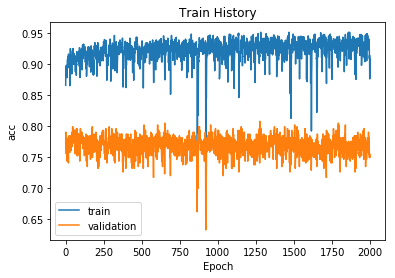

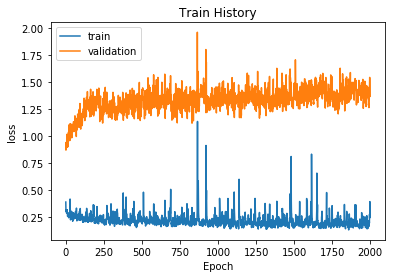

In [210]:
show_train_history(train_history, 'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [211]:
scores = model.evaluate(X_test, Y_test)

429/429 [==============================] - 0s 34us/step


In [212]:
scores[1] * 100

73.42657345436115

### Before saving: are you sure?

In [ ]:
model.save_weights("model_10_10_20_tanh_100_1000_50.h5")
#for this
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/

## MUST-SEE: 
* https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models
* https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d
* https://medium.com/cracking-the-data-science-interview/a-gentle-introduction-to-neural-networks-for-machine-learning-d5f3f8987786
## Just liked:
* https://missinglink.ai/guides/neural-network-concepts/classification-neural-networks-neural-network-right-choice/
## Full-house:
https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

### 3.3 Question

* Why rerunning with same configuration gives different output?

# 4. Performance Metrics:

In [ ]:
import h5py

In [ ]:
model_load = Sequential()
model_load.add(Dense(units = 10, 
                input_dim = 71, 
                activation = 'tanh',))
model_load.add(Dense(units = 10, 
                activation = 'tanh'))
model_load.add(Dense(units = 20, 
                activation = 'tanh'))
model_load.add(Dense(units = 42, 
                activation = 'softmax'))

In [ ]:
model_load.load_weights('/home/amanzhol/Documents/Capstone/MAIN Work/models/model_10_10_20_tanh_100_1000_50.h5')

Why do I need to compile before evaluating?

In [ ]:
model_load.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
evaluation = model_load.evaluate(X_test, Y_test)

In [ ]:
evaluation[1] * 100

### State-of-the-art on this dataset (accuarcy)

Results of Ms. Asma Salem

<img src='AsmaSalemResults.png'>

In [ ]:
#model prediction
predictions = model_load.predict(X_test)

In [ ]:
Y_pred = (predictions > 0.5)

In [ ]:
Y_pred

In [ ]:
Y_test

### 4.1 Confusion Matrix

Implementing confustion matrix from source:
https://stackoverflow.com/questions/50920908/get-confusion-matrix-from-a-keras-multiclass-model

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

In [ ]:
confusion = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

### 4.2 FAR, FRR and EER

Source: https://stats.stackexchange.com/questions/272962/are-far-and-frr-the-same-as-fpr-and-fnr-respectively

In [ ]:
type(confusion)

In [ ]:
confusion.shape

<img src='ConfusionMatrix.png'>

<img src='PerformanceMetrics.png'>

> Edit:
this is the format for confusion_matrix():
[[TP,FN]
[FP,TN]]
And classification report gives all this

In [ ]:
confusion[0].shape

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

In [ ]:
#Thus
TP = 6
FP = 1
TN = 11
FN = 67

In [ ]:
def FAR(FP, TN):
    return FP/(FP + TN)

def FRR(FN, TP):
    return FN/(FN + TP)

In [ ]:
FAR(FP, TN) * 100

In [ ]:
FRR(FN, TP) * 100

### State-of-the-art on this dataset (Performance Metrics)

Ms. Asma Results
* FAR = 0.3%
* FRR = 1.5%
* EER = 0.9%

### Questions
* How to have several FAR, FRR?

### To read for Confusion Matrix - Get Items FP/FN/TP/TN - Python
* https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
* https://classeval.wordpress.com/introduction/basic-evaluation-measures/